<a href="https://colab.research.google.com/github/ShriAmogh/Deep_Learning/blob/main/cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-02 19:26:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.207, 142.250.152.207, 142.251.120.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   246MB/s    in 0.4s    

2023-12-02 19:26:37 (246 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/


test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

In [ ]:
for dirnames, dirpath , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images in {dirnames}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):


  #setup the target directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  #plot image
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img

['823104.jpg']
Image shape : (306, 512, 3)


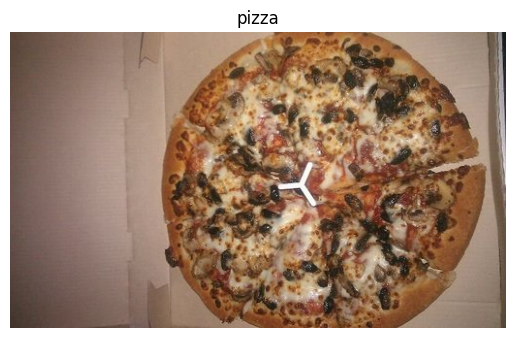

In [ ]:
img = view_random_image(target_dir= "pizza_steak/train/",
                        target_class = "pizza")

Now building a cnn

* Load images
* Preprocess the images(scaling/normalizing pixels between 0 to 255)
* Build cnn to find patterns in our images
* Compile the cnn
* Fit the cnn to our training data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#now preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#passing directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (224,224), seed = 42, class_mode= "binary")

valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (224,224), seed = 42, class_mode= "binary")

#Build a cnn

model_1  = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, input_shape = (224,224,3), activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2 , padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
])

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data , epochs = 5, steps_per_epoch= len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 157ms/step - loss: 0.5777 - accuracy: 0.7073 - val_loss: 0.4723 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4567 - accuracy: 0.7940 - val_loss: 0.3731 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4163 - accuracy: 0.8180 - val_loss: 0.4020 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3852 - accuracy: 0.8420 - val_loss: 0.3736 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3470 - accuracy: 0.8513 - val_loss: 0.3597 - val_accuracy: 0.8480


In [ ]:
from tensorflow.keras.utils import plot_model

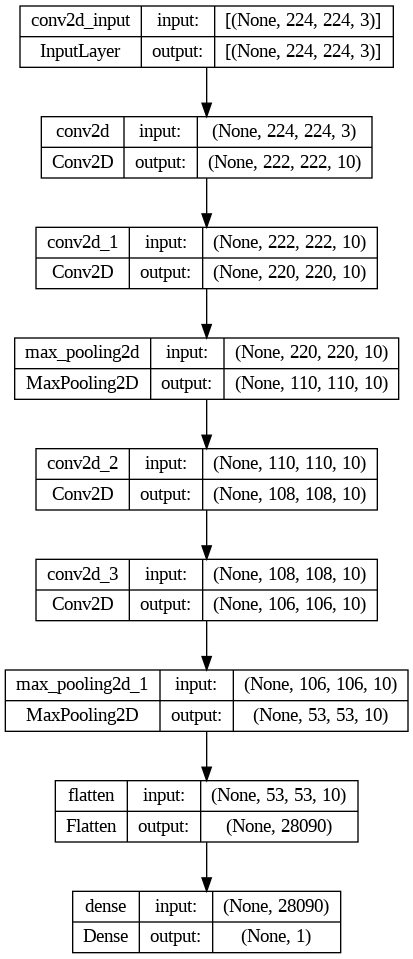

In [ ]:
plot_model(model_1 , show_shapes = True)

Now trying to use a neural network for image classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size= 32, target_size= (224,224), class_mode = "binary")
valid_data = test_datagen.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (224,224), class_mode= "binary")





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_nn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_nn.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

model_nn.fit(train_data , epochs = 10, steps_per_epoch = len(train_data),
             validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 8s 133ms/step - loss: 3.1289 - accuracy: 0.6047 - val_loss: 1.5303 - val_accuracy: 0.6400
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 0.9886 - accuracy: 0.6787 - val_loss: 0.8717 - val_accuracy: 0.6420
Epoch 3/10
47/47 [==============================] - 5s 107ms/step - loss: 0.7333 - accuracy: 0.7187 - val_loss: 0.4861 - val_accuracy: 0.7820
Epoch 4/10
47/47 [==============================] - 6s 126ms/step - loss: 0.8909 - accuracy: 0.7120 - val_loss: 0.5430 - val_accuracy: 0.7520
Epoch 5/10
47/47 [==============================] - 5s 112ms/step - loss: 0.5097 - accuracy: 0.7673 - val_loss: 0.4527 - val_accuracy: 0.7740
Epoch 6/10
47/47 [==============================] - 5s 114ms/step - loss: 0.4292 - accuracy: 0.8073 - val_loss: 0.4466 - val_accuracy: 0.7760
Epoch 7/10
47/47 [==============================] - 6s 124ms/step - loss: 0.4546 - accuracy: 0.7973 - val_loss: 0.4276 - val_accuracy: 0.8060
Epoch 

In [ ]:
model_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Processing data

Next step is turn data into batches (a batch of 32)
as 10,000 images require more memory of the processor.


32 is good


In [ ]:
#now creating train and test data and rescaling it

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
#loading data from directories

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size=32, target_size=(224,224), class_mode = "binary")

test_data = test_datagen.flow_from_directory(directory = test_dir, class_mode = "binary", target_size = (224,224), batch_size= 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get a sample of batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
images[:1]

array([[[[0.3803922 , 0.25490198, 0.20392159],
         [0.3529412 , 0.21960786, 0.17254902],
         [0.3372549 , 0.19607845, 0.14901961],
         ...,
         [0.882353  , 0.93725497, 0.9490197 ],
         [0.89019614, 0.9450981 , 0.9568628 ],
         [0.9058824 , 0.9607844 , 0.9725491 ]],

        [[0.4156863 , 0.3137255 , 0.2627451 ],
         [0.3803922 , 0.27058825, 0.22352943],
         [0.35686275, 0.23137257, 0.18823531],
         ...,
         [0.882353  , 0.93725497, 0.9490197 ],
         [0.8862746 , 0.94117653, 0.95294124],
         [0.92549026, 0.9803922 , 0.9921569 ]],

        [[0.4431373 , 0.36862746, 0.3137255 ],
         [0.43529415, 0.34901962, 0.29803923],
         [0.4039216 , 0.29803923, 0.25490198],
         ...,
         [0.90196085, 0.9568628 , 0.9686275 ],
         [0.8941177 , 0.9490197 , 0.9607844 ],
         [0.9215687 , 0.97647065, 0.98823535]],

        ...,

        [[0.03137255, 0.03137255, 0.03921569],
         [0.03137255, 0.03137255, 0.03921569]

Now building a CNN model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, #filter is the number of sliding windows going across the input(higher =more complex model.)
                           kernel_size = 3, #it is the size of sliding window going across a input
                           strides = 1,#the size of the step the sliding window across an input
                           activation = "relu", padding = "valid", # if "same", output shape is same as input shape, "valid" output shape gets compressed.
                           input_shape = (224,224, 3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data= test_data, validation_steps= len(test_data) )

Epoch 1/5
47/47 [==============================] - 19s 163ms/step - loss: 0.5666 - accuracy: 0.7353 - val_loss: 0.3831 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3692 - accuracy: 0.8400 - val_loss: 0.3802 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.2844 - accuracy: 0.8913 - val_loss: 0.3529 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.1601 - accuracy: 0.9600 - val_loss: 0.3456 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.4394 - val_accuracy: 0.8000


In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import pandas as pd

<Axes: >

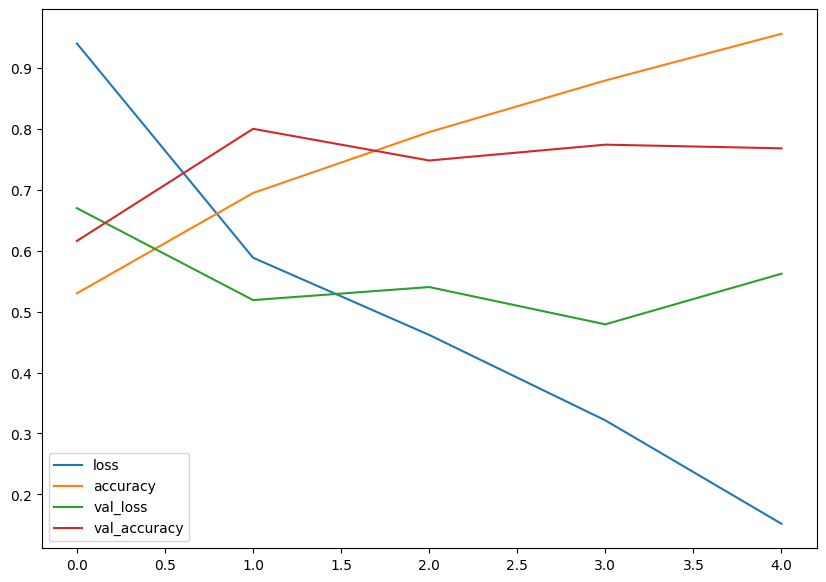

In [ ]:
pd.DataFrame(history_2.history).plot(figsize= (10,7))

In [ ]:
def plot_model_curves(history):

  plt.figure(figsize= (10,7))

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.subplot(1,2,1)

  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "validation loss")
  plt.title("Loss curve")
  plt.xlabel("epochs")

  plt.legend()


  #plot of accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy, label = "Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation_Accuracy")
  plt.legend()
  plt.title("Accuracy Curve")
  plt.xlabel("Accuracy")

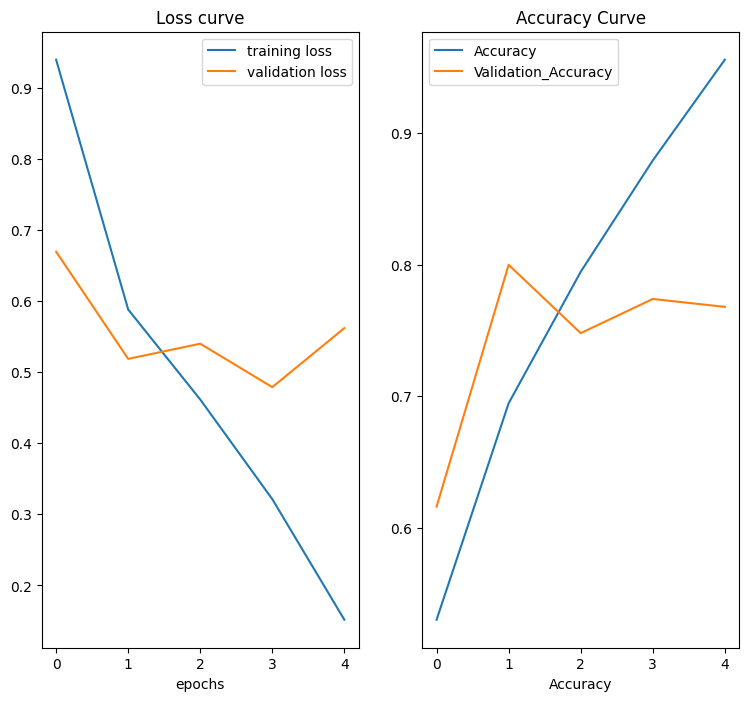

In [ ]:
plot_model_curves(history=history_2)

In [ ]:
#building another model

In [ ]:
train_data[0]

(array([[[[0.36862746, 0.37647063, 0.29411766],
          [0.3921569 , 0.40000004, 0.31764707],
          [0.37254903, 0.3803922 , 0.29803923],
          ...,
          [0.24313727, 0.21960786, 0.16470589],
          [0.2509804 , 0.21960786, 0.16862746],
          [0.2392157 , 0.19215688, 0.14509805]],
 
         [[0.34117648, 0.34901962, 0.26666668],
          [0.36078432, 0.36862746, 0.28627452],
          [0.3529412 , 0.36078432, 0.2784314 ],
          ...,
          [0.23137257, 0.227451  , 0.15686275],
          [0.24705884, 0.22352943, 0.16078432],
          [0.2392157 , 0.21176472, 0.14901961]],
 
         [[0.35686275, 0.3647059 , 0.2784314 ],
          [0.3372549 , 0.34509805, 0.25882354],
          [0.36078432, 0.37647063, 0.28627452],
          ...,
          [0.20784315, 0.21176472, 0.14117648],
          [0.24313727, 0.2392157 , 0.16862746],
          [0.2509804 , 0.2392157 , 0.17254902]],
 
         ...,
 
         [[0.0509804 , 0.05882353, 0.01568628],
          [0.03921

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten


model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3, activation = tf.keras.activations.relu, input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),#maxpool layer finds the most important part of the feature
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(3),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(3),
    Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")


])

In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data = test_data, validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 150ms/step - loss: 0.6718 - accuracy: 0.5787 - val_loss: 0.5991 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5053 - accuracy: 0.7667 - val_loss: 0.3800 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4226 - accuracy: 0.8080 - val_loss: 0.3725 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4078 - accuracy: 0.8220 - val_loss: 0.3317 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3857 - accuracy: 0.8427 - val_loss: 0.3354 - val_accuracy: 0.8660


In [ ]:
import matplotlib.image as mpimg

pizza_1 = mpimg.imread("/content/vegetarian-pizza.jpg")
#model_3.predict("vegetarian-pizza.jpg")


In [ ]:
pizza_1.shape
expaned_img = tf.expand_dims(pizza_1, axis = 0)

ValueError: ignored

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 11, 11, 10)       

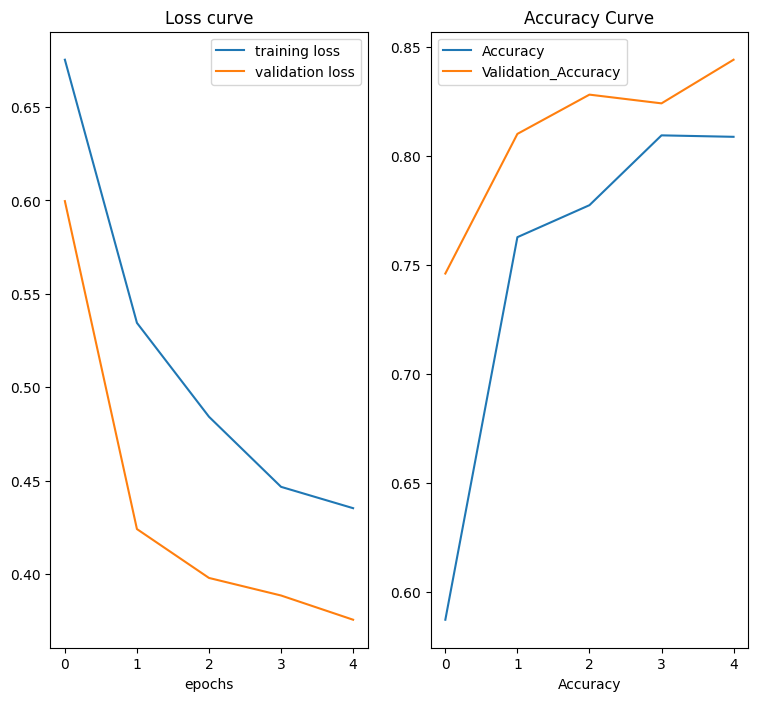

In [ ]:
 plot_model_curves(history = history_3)

In [ ]:
#reducing overfitting is also known as regularization.
'''
Reduce overfitting
- By regularization(adding MaxPool2D layer)
- Data augmentation
- Add more data...
'''

Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.3,
                                          horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)

train_dir = "pizza_steak/train/"


In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size = (224,224), class_mode = "binary",
                                                                   shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir,batch_size = 32, class_mode= "binary", target_size = (224,224))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
#augmented only works on training data

In [ ]:
test_dir = "pizza_steak/test/"
test_datagen = ImageDataGenerator(rescale = 1/255.)

test_data = test_datagen.flow_from_directory(test_dir, batch_size = 32, class_mode = "binary", target_size = (224,224))

Found 500 images belonging to 2 classes.


In [ ]:
images_aug, labels_aug = train_data_augmented.next()
images , labels = train_data.next()

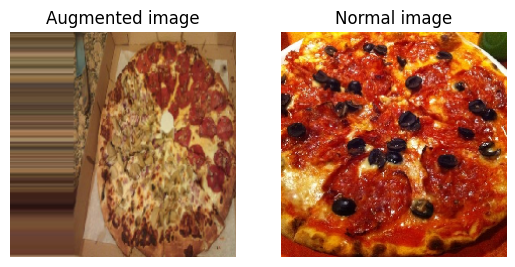

In [ ]:
import random
random_num = random.randint(0,31)
plt.subplot(1,2,1)
plt.title("Augmented image")
plt.axis(False)
plt.imshow(images_aug[random_num])

plt.subplot(1,2,2)
plt.axis(False)
plt.title("Normal image")
plt.imshow(images[random_num])

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model_4 = tf.keras.Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3 , activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3 , activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_4.compile(optimizer = "Adam",
                loss = "binary_crossentropy",
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented, epochs = 5, steps_per_epoch=len(train_data_augmented),
                        validation_data= test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 38s 530ms/step - loss: 0.7349 - accuracy: 0.4980 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6916 - accuracy: 0.4933 - val_loss: 0.6665 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 515ms/step - loss: 0.6875 - accuracy: 0.4880 - val_loss: 0.6626 - val_accuracy: 0.5000
Epoch 4/5
42/47 [=========================>....] - ETA: 2s - loss: 0.6817 - accuracy: 0.5149

KeyboardInterrupt: ignored

Its takes time because it is augmented on flies as its not loaded,
done on cpu.

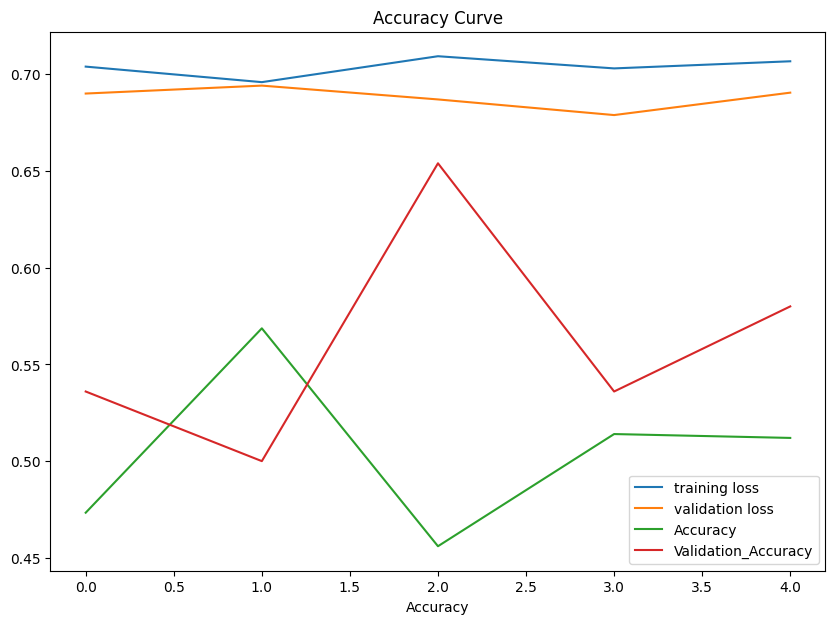

In [ ]:
plot_model_curves(history_4)

Now load our custom image

In [ ]:
import matplotlib.image as  mpimg

pizza_1 = mpimg.imread("/content/vegetarian-pizza.jpg")
pizza_1

array([[[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [208, 211, 220],
        [208, 211, 220],
        [208, 211, 220]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [208, 211, 220],
        [208, 211, 220],
        [208, 211, 220]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [208, 211, 220],
        [208, 211, 220],
        [208, 211, 220]],

       ...,

       [[220, 223, 228],
        [220, 223, 228],
        [219, 222, 227],
        ...,
        [214, 222, 235],
        [214, 222, 235],
        [214, 222, 235]],

       [[221, 224, 229],
        [221, 224, 229],
        [220, 223, 228],
        ...,
        [214, 222, 235],
        [214, 222, 235],
        [214, 222, 235]],

       [[222, 225, 230],
        [221, 224, 229],
        [220, 223, 228],
        ...,
        [214, 222, 235],
        [214, 222, 235],
        [214, 222, 235]]

In [ ]:
#function to load in and preprocess our custom image

def load_and_preprocess(filename, img_size = 224):

  #first read image
  img = tf.io.read_file(filename)

  #decode the image into tensors
  img = tf.image.decode_image(img)

  #resizinf image
  img = tf.image.resize(img , size = [img_size, img_size])

  img = img/255.

  return img

In [ ]:
pizza_1 = load_and_preprocess("/content/vegetarian-pizza.jpg")

In [ ]:
pizza_1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        ...,
        [0.827451  , 0.84313726, 0.8784314 ],
        [0.81309694, 0.8287832 , 0.8640773 ],
        [0.80784315, 0.8235294 , 0.85882354]],

       [[0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        ...,
        [0.8306022 , 0.8462885 , 0.8815826 ],
        [0.8185551 , 0.8342414 , 0.8695355 ],
        [0.80898744, 0.8246737 , 0.8599678 ]],

       [[0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        [0.91764706, 0.9372549 , 0.9490196 ],
        ...,
        [0.8392157 , 0.85490197, 0.8901961 ],
        [0.8334741 , 0.8491604 , 0.8844545 ],
        [0.81211513, 0.8278014 , 0.8630955 ]],

       ...,

       [[0.833543  , 0.85315084, 0.86491555],
        [0.83

In [ ]:
pred = model_3.predict(tf.expand_dims(pizza_1, axis = 0))

1/1 [==============================] - 0s 99ms/step


In [ ]:
classes_name = ['pizza', 'steak']

In [ ]:
pred_class = classes_name[int(tf.round(pred))]

In [ ]:
pred_class

'pizza'

Now making functions to predict

In [ ]:
def plot_vision(model, filename , class_name = classes_name):

  img = load_and_preprocess(filename)


  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = classes_name[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")

1/1 [==============================] - 0s 22ms/step


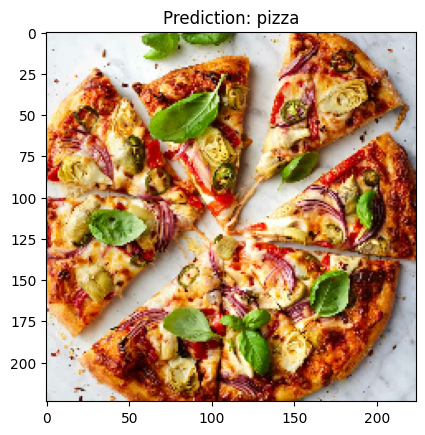

In [ ]:
plot_vision(model_3, "/content/vegetarian-pizza.jpg")

Multiclass classification

            

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-03 06:24:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M   226MB/s    in 2.2s    

2023-12-03 06:24:28 (226 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

There are 2 directories and 0 images in 10_food_classes_all_data 
There are 10 directories and 0 images in 10_food_classes_all_data/test 
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream 
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry 
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon 
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen 
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza 
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger 
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice 
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings 
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi 
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak 
There are 10 directories and 0 ima

In [ ]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
#now seting up data

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"



In [ ]:
#now getting class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen_multi = ImageDataGenerator(rescale = 1/255.)
test_datagen_multi = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data_multi = train_datagen_multi.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (224,224),
                                                           class_mode= "categorical")

test_data_multi = test_datagen_multi.flow_from_directory(directory = test_dir, batch_size = 32, target_size = (224,224),
                                                         class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#cnn model for multiclass
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_5 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = "valid", activation = "relu", input_shape = (224,224,3)),
    Conv2D(10,3,1, activation = "relu"),
    MaxPool2D(3),
    Conv2D(10,3,1, activation = "relu"),
    Conv2D(10,3,1, activation = "relu"),
    MaxPool2D(3),
    Flatten(),
    Dense(10, activation = "softmax")
])

In [ ]:
model_5.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ['accuracy'])



In [ ]:
history_5 = model_5.fit(train_data_multi, epochs=10, steps_per_epoch = len(train_data_multi),
                        validation_data= test_data_multi, validation_steps = len(test_data_multi))

Epoch 1/10
235/235 [==============================] - 36s 146ms/step - loss: 2.2196 - accuracy: 0.1719 - val_loss: 2.0643 - val_accuracy: 0.2524
Epoch 2/10
235/235 [==============================] - 29s 125ms/step - loss: 1.9792 - accuracy: 0.3001 - val_loss: 1.8875 - val_accuracy: 0.3396
Epoch 3/10
235/235 [==============================] - 29s 125ms/step - loss: 1.8279 - accuracy: 0.3712 - val_loss: 1.8995 - val_accuracy: 0.3176
Epoch 4/10
235/235 [==============================] - 30s 129ms/step - loss: 1.6812 - accuracy: 0.4241 - val_loss: 1.8281 - val_accuracy: 0.3488
Epoch 5/10
235/235 [==============================] - 30s 128ms/step - loss: 1.5251 - accuracy: 0.4820 - val_loss: 1.8918 - val_accuracy: 0.3564
Epoch 6/10
235/235 [==============================] - 29s 124ms/step - loss: 1.3600 - accuracy: 0.5397 - val_loss: 1.9295 - val_accuracy: 0.3544
Epoch 7/10
235/235 [==============================] - 29s 124ms/step - loss: 1.1903 - accuracy: 0.5979 - val_loss: 2.2638 - val_ac